## Import needed libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# a) Load and show the 'coins.jpg' image

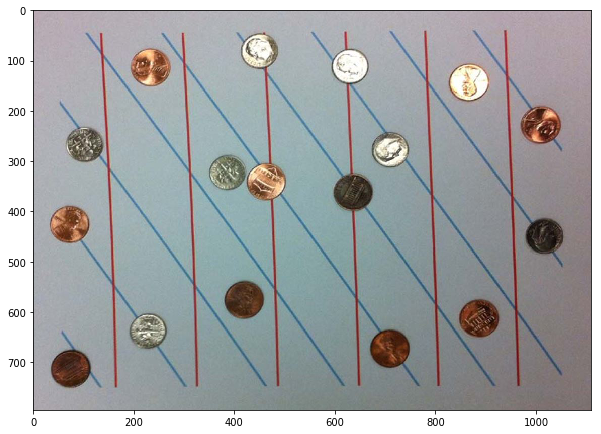

In [232]:
image = plt.imread('../resources/coins.jpg')
plt.figure(figsize=(10,20))
plt.imshow(image)

# b) Implement hough transform and show the detected lines in 'coins.jpg' image

In [229]:
def hough_line(img):
    # Rho and Theta ranges
    thetas = np.deg2rad(np.arange(-90.0, 90.0))
    width, height = img.shape
    diag_len = np.int(np.ceil(np.sqrt(width * width + height * height)))   # max_dist
    rhos = np.linspace(0, diag_len, diag_len+1)

    # Cache some resuable values
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)

    # Hough accumulator array of theta vs rnumpy cotangentho
    accumulator = np.zeros((diag_len+1, num_thetas), dtype=np.uint64)
    x_idxs, y_idxs = np.nonzero(img)  # (row, col) indexes to edges

    # Vote in the hough accumulator
    for i in range(np.count_nonzero(img)):
        x = x_idxs[i]
        y = y_idxs[i]

        for t_idx in range(num_thetas):
            # Calculate rho. diag_len is added for a positive index
            rho = np.int(round(x * cos_t[t_idx] + y * sin_t[t_idx]))
            if rho <= diag_len and rho >= 0:
                accumulator[rho, t_idx] += 1

    return accumulator, thetas, rhos

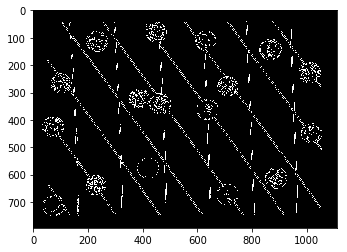

In [239]:
edges = cv2.Canny(image,100,200)
plt.imshow(edges, cmap="gray")

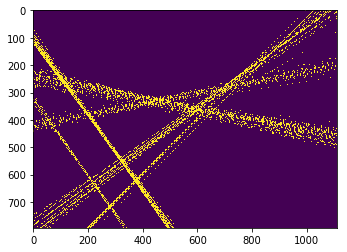

In [316]:
accumulator, thetas, rhos = hough_line(edges)
sorted_rhos, sorted_t_idxs = np.unravel_index(np.argsort(-1*accumulator, axis=None), accumulator.shape)

y_max = edges.shape[1]-1
result = np.zeros(edges.shape)
number_of_lines = 200

for l in range(number_of_lines):
    theta = thetas[sorted_t_idxs[l]]
    rho = sorted_rhos[l]
    m = -1/np.tan(theta)
    c = rho/np.sin(theta)

    for x in np.array(range(edges.shape[0])):
            y = np.int(m * x + c)

            if y <= y_max and y >= 0:
                result[x][y] = 1

plt.imshow(result)

# c) Do hough transform using OpenCV built-in library

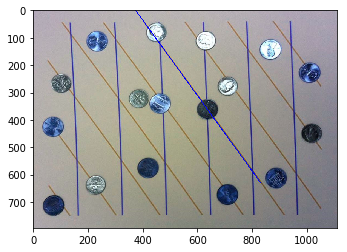

In [322]:
img = cv2.imread('../resources/coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)

for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(img)